In [108]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [140]:
mean_01 =[0.5,1.0]
mean_02 =[5.0,6.0]

cov_01=[[0.5,0.1],[0.1,0.5]]
cov_02=[[1.0,0.1],[0.1,1.0]]
dist_01=np.random.multivariate_normal(mean_01,cov_01,500)
dist_02=np.random.multivariate_normal(mean_02,cov_02,500)

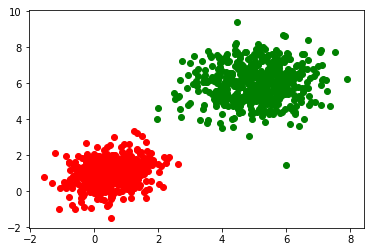

In [141]:
plt.scatter(dist_01[:,0],dist_01[:,1],color='red')
plt.scatter(dist_02[:,0],dist_02[:,1],color='green')
plt.show()

In [142]:
rows = dist_01.shape[0]+dist_02.shape[0]
cols=dist_01.shape[1]+1

data=np.zeros((rows,cols))
data[:dist_01.shape[0],:2]=dist_01
data[dist_01.shape[0]:,:2]=dist_02
data[dist_01.shape[0]:,-1]=1.0
print data.shape

(1000L, 3L)


In [143]:
np.random.shuffle(data)
test_Data= data[:10]

In [161]:
def distance_euclid(p1,p2):
    #Euclidian
    d=np.sqrt(((p1-p2)**2).sum())
    return d

In [162]:
def distance(p1,p2):
    # Manhattan distance
    d= (abs(p1-p2)).sum()
    return d

In [245]:
def KNN(X_train, Y_train, xtest, k=5):
    vals=[]
    for ix in range(X_train.shape[0]):
        d=distance_euclid(X_train[ix],xtest)
        vals.append([d,Y_train[ix]])
        
    sorted_vals=sorted(vals, key=lambda z:z[0])
    neighbours=np.array(sorted_vals)[:k,-1]
    freq=np.unique(neighbours, return_counts=True)
    my_ans=freq[0][freq[1].argmax()]
    return my_ans

In [246]:
### dataset for input
X_train=test_Data[:,:2]
Y_train=test_Data[:,-1]
x_test=np.array([2.9,2.9])
k=3
ans=KNN(X_train,Y_train,x_test,3)
print ans

1.0


In [247]:
## Test and train split

split =int(0.25 * data.shape[0])

train_x=data[:split,:2]
train_y=data[:split,-1]

print np.unique(train_y,return_counts=True)

test_x=data[split:,:2]
test_y=data[split:,-1]

print train_x.shape
print train_y.shape


(array([0., 1.]), array([135, 115], dtype=int64))
(250L, 2L)
(250L,)


In [248]:
def get_acc(kx,x_train,x_test,y_train,y_test):
    preds=[]
    for ix in range(x_test.shape[0]):
        label=KNN(x_train,y_train,x_test[ix],k=kx)
        preds.append(label)
    preds=np.array(preds)
    return 100*float((preds==y_test).sum())/y_test.shape[0]

In [249]:
get_acc(1,train_x,test_x,train_y,test_y)

99.86666666666666

In [250]:
for kx in range(3,9,2):
    print kx, "|", get_acc(kx,train_x,test_x,train_y,test_y)

3 | 100.0
5 | 99.8666666667
7 | 100.0


In [251]:
import pandas as pd

In [219]:
#fashion dataset for MNIST
ds=pd.read_csv('d:/ML--perceptron/fashionmnist/fashion-mnist_train.csv')

ds.head()
fashion_data=ds.values[:3000]
print fashion_data.shape

In [252]:
#splitting the dataset
fashion_split=int(fashion_data.shape[0]*0.8)
fashion_train_x=fashion_data[:fashion_split,1:]
fashion_train_y=fashion_data[:fashion_split,0]

fashion_test_x=fashion_data[split:,1:]
fashion_test_y=fashion_data[split:,0]

print np.unique(fashion_test_y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([291, 284, 279, 268, 284, 251, 258, 293, 261, 281], dtype=int64))


In [253]:
get_acc(2,fashion_train_x,fashion_test_x,fashion_train_y,fashion_test_y)

87.63636363636364

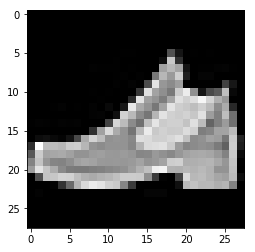

9


In [234]:
plt.imshow(fashion_train_x[1].reshape(28,28),cmap='gray')
plt.show()
print fashion_train_y[1]

In [242]:
def my_func(arg1):
    '''this is definition'''
    print "hello"

my_func(1) 

##just learning about docstring comments of functions..

hello


In [259]:
import warnings
warnings.filterwarnings('ignore')

In [260]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [269]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(fashion_train_x,fashion_train_y)
neigh.predict(fashion_test_x)
neigh.score(fashion_test_x,fashion_test_y)


0.8763636363636363

In [ ]:
def get_acc(kx,x_train,x_test,y_train,y_test):
    preds=[]
    for ix in range(x_test.shape[0]):
        label=KNN(x_train,y_train,x_test[ix],k=kx)
        preds.append(label)
    preds=np.array(preds)
    return 100*float((preds==y_test).sum())/y_test.shape[0]